In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msgo
import seaborn as sns
from sklearn.linear_model import LinearRegression
import plotly.express as px
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Loading Data 

In [22]:
df = pd.read_csv('./covid_vaccination_vs_death_ratio.csv')
df = df.loc[:, df.columns != "Unnamed: 0"]
df.head()


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
0,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,12,40094444.0,1.119552
1,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,10,40094444.0,1.173083
2,Afghanistan,AFG,2021-05-24,573277.0,476367.0,96910.0,10,40094444.0,1.188112
3,Afghanistan,AFG,2021-05-26,590454.0,479372.0,111082.0,19,40094444.0,1.195607
4,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,14,40094444.0,1.196111


#### Extraer datos de CHILE

In [7]:
countries = df.groupby('country')
chile = countries.get_group('Chile')
chile.head(5)

,Unnamed: 0,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
3541,3541,Chile,CHL,2021-01-13,11742.0,10710.0,1032.0,20,19242590.0,0.055658
3542,3542,Chile,CHL,2021-01-14,18659.0,12830.0,5829.0,22,19242590.0,0.066675
3543,3543,Chile,CHL,2021-01-15,22090.0,13787.0,8303.0,90,19242590.0,0.071648
3544,3544,Chile,CHL,2021-01-16,22180.0,13810.0,8370.0,75,19242590.0,0.071768
3545,3545,Chile,CHL,2021-01-17,22180.0,13810.0,8370.0,66,19242590.0,0.071768


##### Basic Information of Data

In [28]:
chile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269 entries, 3541 to 3809
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               269 non-null    int64  
 1   country                  269 non-null    object 
 2   iso_code                 269 non-null    object 
 3   date                     269 non-null    object 
 4   total_vaccinations       269 non-null    float64
 5   people_vaccinated        269 non-null    float64
 6   people_fully_vaccinated  269 non-null    float64
 7   New_deaths               269 non-null    int64  
 8   population               269 non-null    float64
 9   ratio                    269 non-null    float64
dtypes: float64(5), int64(2), object(3)
memory usage: 23.1+ KB


In [27]:
chile.shape

(269, 10)

In [5]:
chile.describe()

,Unnamed: 0,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
count,269.000000,2.690000e+02,2.690000e+02,2.690000e+02,269.000000,269.0,269.000000
mean,3675.000000,1.715330e+07,9.335486e+06,7.583415e+06,75.728625,19242590.0,48.514706
std,77.797815,1.039323e+07,4.950720e+06,5.128404e+06,54.466791,0.0,25.727932
min,3541.000000,1.174200e+04,1.071000e+04,1.032000e+03,0.000000,19242590.0,0.055658
25%,3608.000000,8.497707e+06,5.613902e+06,2.883805e+06,30.000000,19242590.0,29.174358
50%,3675.000000,1.831569e+07,1.037757e+07,7.938113e+06,70.000000,19242590.0,53.930230
75%,3742.000000,2.601022e+07,1.393449e+07,1.258335e+07,109.000000,19242590.0,72.414852
max,3809.000000,3.334900e+07,1.590983e+07,1.421379e+07,316.000000,19242590.0,82.680310


#### Dealing with null-values
##### missinggo cool tool to visualizing null values

<AxesSubplot:>

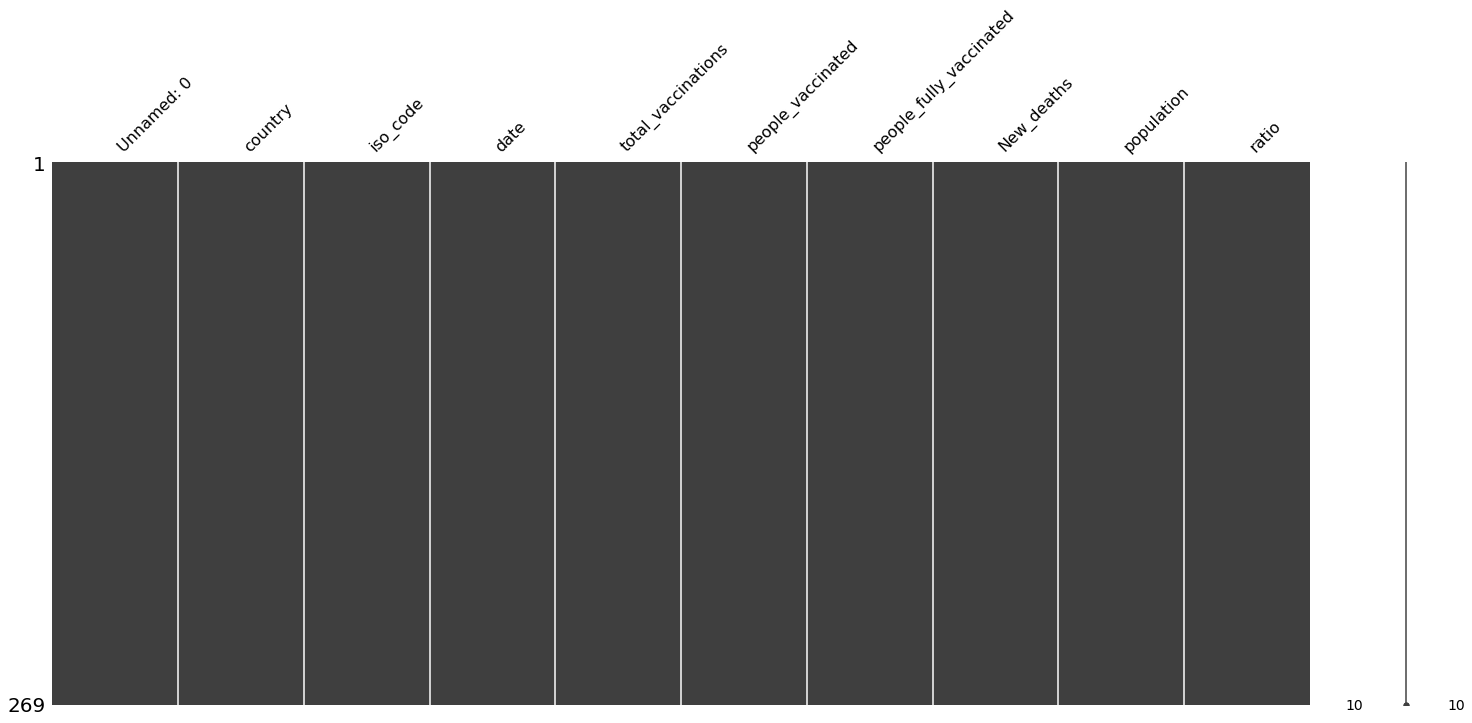

In [7]:
msgo.matrix(chile)

In [29]:
chile.head()

,Unnamed: 0,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
3541,3541,Chile,CHL,2021-01-13,11742.0,10710.0,1032.0,20,19242590.0,0.055658
3542,3542,Chile,CHL,2021-01-14,18659.0,12830.0,5829.0,22,19242590.0,0.066675
3543,3543,Chile,CHL,2021-01-15,22090.0,13787.0,8303.0,90,19242590.0,0.071648
3544,3544,Chile,CHL,2021-01-16,22180.0,13810.0,8370.0,75,19242590.0,0.071768
3545,3545,Chile,CHL,2021-01-17,22180.0,13810.0,8370.0,66,19242590.0,0.071768


#### What dates we have? 

In [42]:
dates = chile.date.to_list()
print(f"Primeras 5 fechas: {dates[:4]}")
print(f"Ultimas 5 fechas: {dates[-5:-1]}")

Primeras 5 fechas: ['2021-01-13', '2021-01-14', '2021-01-15', '2021-01-16']
Ultimas 5 fechas: ['2021-10-04', '2021-10-05', '2021-10-06', '2021-10-07']


#### Ratio of people fully vaccinated

In [45]:
#total population in Chile
total_population_chile = chile['population'].max()
#'people_fully_vaccinated' is an accumulation variable we need get the maximum value for each country
# and sum them
people_full_vaccinated = chile['people_fully_vaccinated'].max()


# Plotting Pie Chart

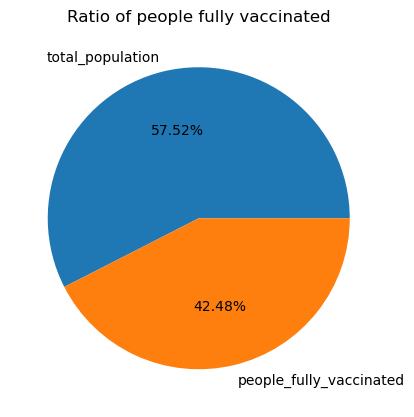

In [51]:
plt.figure(figsize=(10,5),dpi=100)
plt.pie(
    [total_population_chile,people_full_vaccinated],
    autopct='%.2F%%',
    labels=['total_population','people_fully_vaccinated'])
plt.title('Ratio of people fully vaccinated')
plt.show()

## Ratio of people vaccinated

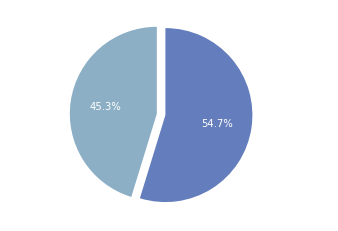

In [96]:
#number of people who got at least one shot of COVID vaccine
people_one_vac = chile['people_vaccinated'].max()

labels = 'Vaccinated', 'No vaccinated'
sizes = [people_one_vac, total_population_chile]
explode = [0.1, 0]

cmap = plt.colormaps["twilight"]
color = cmap([70, 120])

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", startangle=90, colors=color, textprops=dict(color="w"))

plt.show()

#### Grouping Data Times Series

In [98]:
date_group = chile.groupby('date').agg('sum').reset_index()
date_group.head()

,date,Unnamed: 0,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
0,2021-01-13,3541,11742.0,10710.0,1032.0,20,19242590.0,0.055658
1,2021-01-14,3542,18659.0,12830.0,5829.0,22,19242590.0,0.066675
2,2021-01-15,3543,22090.0,13787.0,8303.0,90,19242590.0,0.071648
3,2021-01-16,3544,22180.0,13810.0,8370.0,75,19242590.0,0.071768
4,2021-01-17,3545,22180.0,13810.0,8370.0,66,19242590.0,0.071768


# Plotting line chart

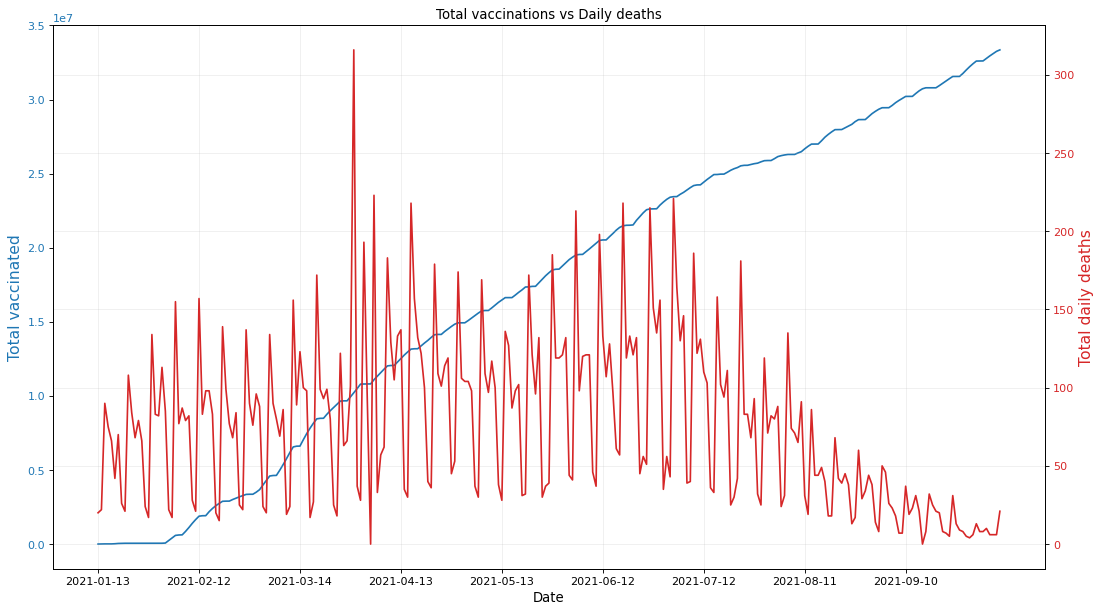

In [102]:
x = date_group['date']
y1 = date_group['total_vaccinations']
y2 = date_group['New_deaths']

# RED LINE VACCINATIONS
fig, ax1 = plt.subplots(1, 1, figsize=(16,9), dpi= 80)
ax1.plot(x, y1, color='tab:blue')

# BLUE LINE DEATHS
ax2 = ax1.twinx()
ax2.plot(x, y2, color='tab:red')

ax1.set_xlabel('Date', fontsize='12')
ax1.tick_params(axis='x', rotation=0, labelsize=10)
ax1.set_xticks(np.arange(0, len(x), 30))
ax1.set_ylabel('Total vaccinated', fontsize=14, color='tab:blue')
ax1.tick_params(axis='y',rotation=0,labelcolor='tab:blue')
ax1.grid(axis='x',alpha=0.2)

ax2.set_ylabel('Total daily deaths', fontsize=14, color='tab:red')
ax2.tick_params(axis='y',rotation=0,labelcolor='tab:red')
ax2.set_title('Total vaccinations vs Daily deaths')
ax2.grid(alpha=0.2)


# Plotting scatter ---> CHILE

Text(0.5, 1.0, 'ratio vs New_deaths CHILE')

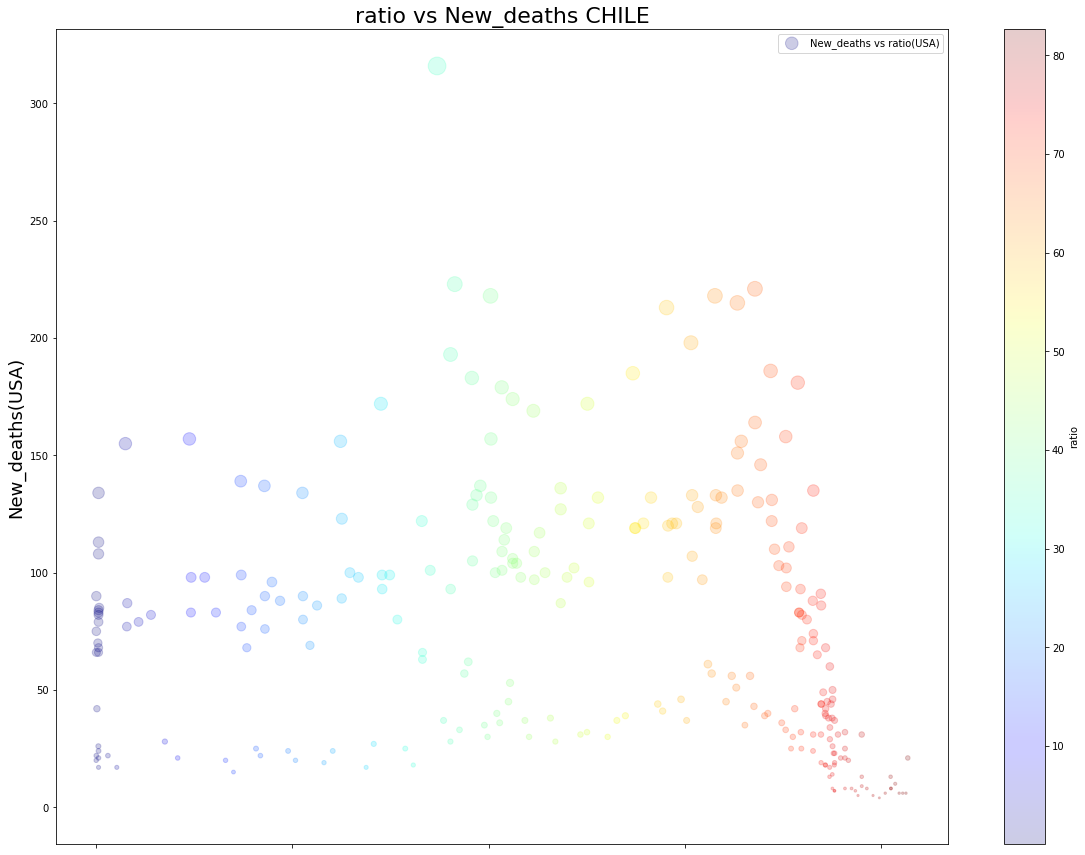

In [19]:
chile.plot(
    kind='scatter',
    x='ratio',
    y='New_deaths',
    label='New_deaths vs ratio(USA)',
    alpha=0.2,
    figsize=(20,15),
    s=chile['New_deaths'],
    c='ratio',
    cmap=plt.get_cmap('jet'),
    colorbar=True)

plt.xlabel('ratio(%)',fontsize=15)
plt.ylabel('New_deaths(USA)',fontsize=18)
plt.title('ratio vs New_deaths CHILE',fontsize=22)
# The radius of each circle represents the district’s population (option s), and the color represents the price (option c).

# Daily World Deaths

No handles with labels found to put in legend.


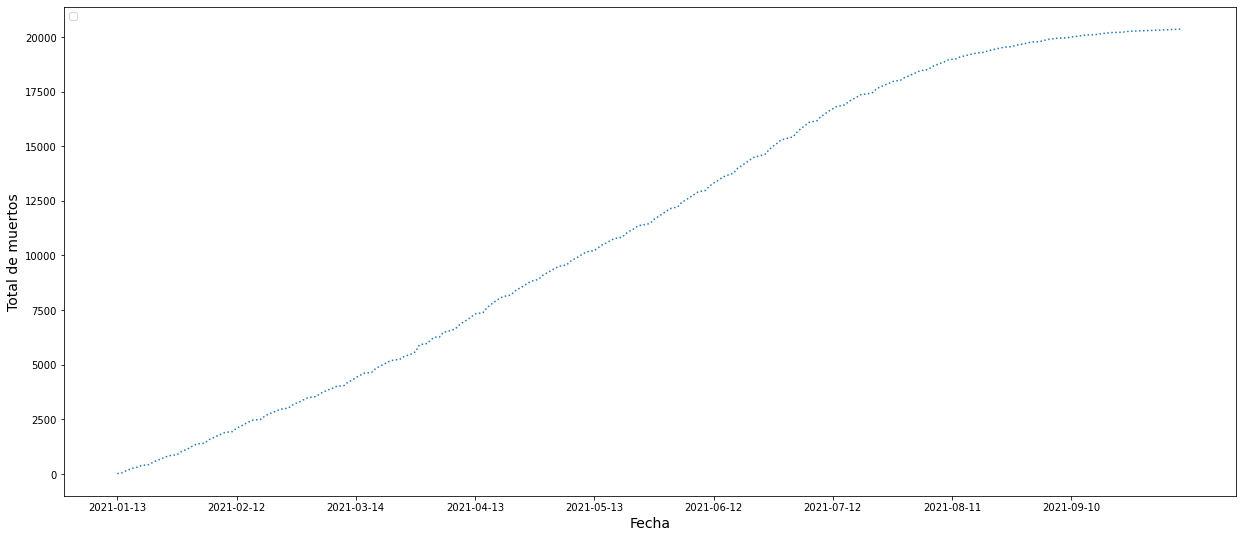

In [20]:
tiempo = date_group['date'].values.tolist()
muertos = chile['New_deaths'].cumsum()

x = tiempo
y = muertos

plt.figure(figsize=(21, 9))
plt.plot(x, y,linestyle='dotted')
plt.xticks(np.arange(0,len(x),30)) #xtick debe ser puesto con np.arange
plt.ylabel('Total de muertos', fontsize='14')
plt.xlabel('Fecha',fontsize='14')
plt.legend(loc='upper left')
plt.show()

# Machine Learning ：Simple LinerRegression

In [61]:
# define x,y
x = chile[['ratio']]
y = chile['New_deaths']

# split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

# fitting 
model = LinearRegression()
model.fit(x_train,y_train)

# coefficients
print ('Coefficients: ', model.coef_.round(2))
print ('Intercept: ',model.intercept_)

Coefficients:  [-0.25]
Intercept:  85.84114998579184


In [62]:
y_pre = model.predict(x_test)
print(y_pre.shape)

(81,)


## Plotting with regression line

Text(0.5, 1.0, 'Liner Regression')

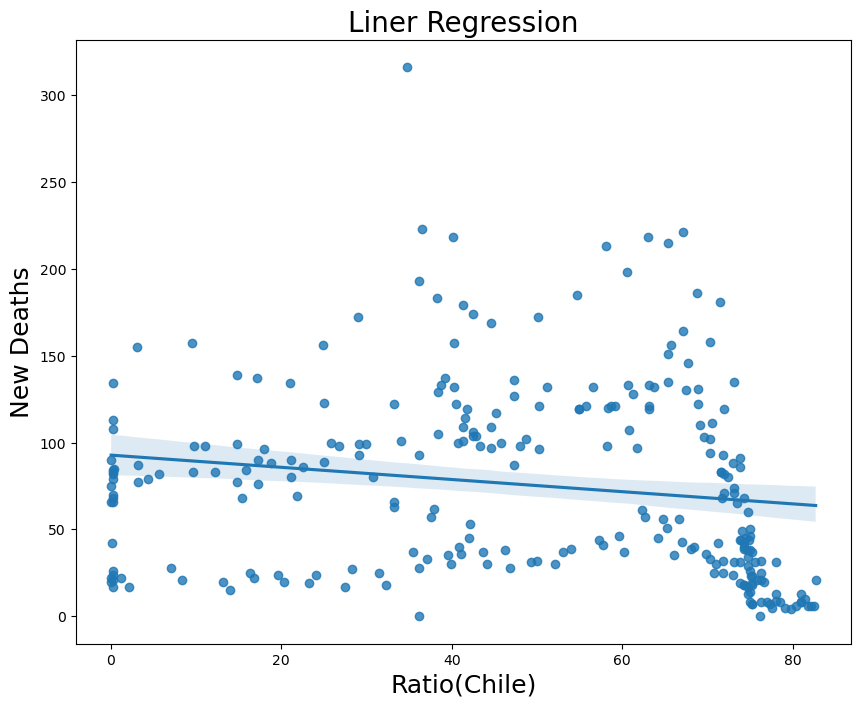

In [63]:
x = chile['ratio']
y = chile['New_deaths']

plt.figure(figsize=(10,8),dpi=100)
sns.regplot(x=x, y=y)
plt.xlabel('Ratio(Chile)',fontsize=18)
plt.ylabel('New Deaths',fontsize=18)
plt.title('Liner Regression',fontsize=20)

In [71]:
new_ratio = np.array([90]).reshape(-1,1)
model.predict(new_ratio)

array([63.21270684])

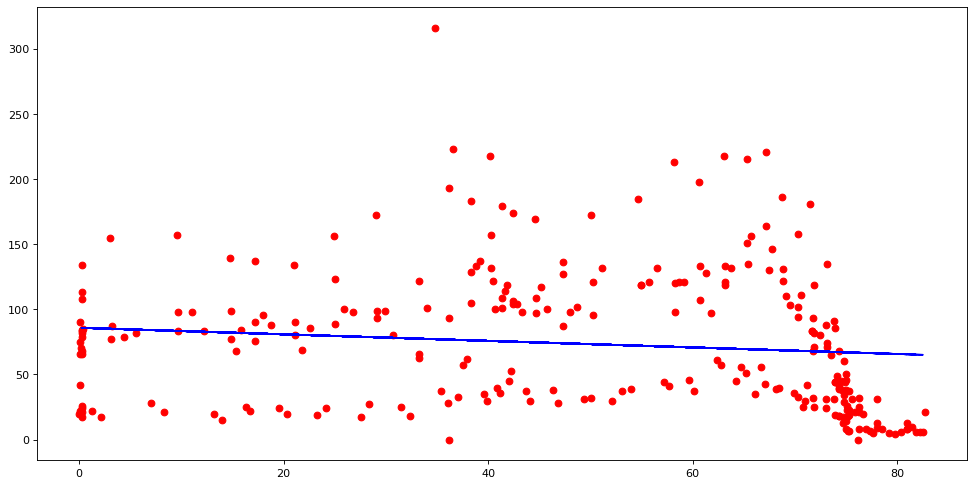

In [95]:
plt.figure(figsize=(15,7.5), dpi=80)
plt.scatter(x,y, color='red')
plt.plot(x_test,y_pre,color='blue')

In [89]:
mean_squared_error(y_test, y_pre)

2504.908978437917

In [90]:
mse = mean_squared_error((y_test),y_pre)

# make sure the output not show with scientific notation
def as_float(x):
    y='{:.50f}'.format(x)
    return  y

print('The Mean Squared Error(MSE) of y_pre is :',as_float(mse))

The Mean Squared Error(MSE) of y_pre is : 2504.90897843791708510252647101879119873046875000000000


In [88]:
mae = mean_absolute_error((y_test),y_pre)
print('The Mean Absolute Error(MAE) of y_pre is :',as_float(mae))

The Mean Absolute Error(MAE) of y_pre is : 41.39269534913182013724508578889071941375732421875000
